## Notebook for plotting deployed performance of Chemprop (OOD)

#### Target property: CE

**Modified on 14th March, 2023; remodified on 7th Feb, 2024 (Including Lit OOD)**

**Note: CE in common log units**

In [1]:
# import chemprop
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import colorsys
plt.rcParams['font.family'] = 'Arial'
from matplotlib import colors as mc
import matplotlib
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, PandasTools, Fragments, Descriptors, rdMolDescriptors
import plotly.express as px
import seaborn as sns
# import molplotly
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [2]:
%%bash
pwd   
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/coulombic-efficiency_1.1/using-pretrainedGR/gr-embed-200/common-log-output
total 2480
drwxr-xr-x   2 riteshk  staff      64 Jan 17 15:10 cluster-split-2
drwxr-xr-x   2 riteshk  staff      64 Jan 17 15:10 cluster-split-1
drwxr-xr-x   2 riteshk  staff      64 Feb  7 14:57 cdf-random-split
drwxr-xr-x   2 riteshk  staff      64 Feb  7 14:57 cdf-stratified-split-2-cv
-rw-r--r--   1 riteshk  staff  409914 Feb  7 23:00 ce_parity_ood_final_gr_strat2_cv_comm.eps
drwxr-xr-x  66 riteshk  staff    2112 Feb  8 07:57 random-split
-rw-r--r--@  1 riteshk  staff  409914 Feb  8 17:38 ce_parity_ood_final_gr_strat2_cv_comm_.eps
drwxr-xr-x@ 87 riteshk  staff    2784 Feb 22 23:44 stratified-split-2-cv
drwxr-xr-x  15 riteshk  staff     480 Feb 23 00:44 stratified-split-1
-rw-------@  1 riteshk  staff  440192 Feb 23 02:11 ood_parity_plot_ce.ipynb


In [3]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input: color (tuple) in RGB format, amount (float) by which to lighten the color. 
    Returns: (tuple) representing the lightened color in RGB format.
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

color = (0.839, 0.286, 0.604) ## purple for CE
lighter_color = lighten_color(color, amount=0.2)

In [4]:
def pred_ce(ncomp, split=None):
    df = df_true.copy()
    pred_array = []
    if split == 'random':
        for i in range(1,6):
            filename = f'./random-split/plsr_model_random_ncomp_{ncomp}_fold_{i}.sav'
            loaded_model = pickle.load(open(filename, 'rb'))
            y_pred_ood = loaded_model.predict(X_ood_)
            pred_array.append(y_pred_ood)

        y_pred_ood_avg = np.mean(pred_array, axis=0)
        y_pred_ood_avg = np.ravel(y_pred_ood_avg)
        y_pred_ood_std = np.std(pred_array, axis=0)
        y_pred_ood_std = np.ravel(y_pred_ood_std)
        df['log(1-CE)'] = y_pred_ood_avg
        df['log(1-CE)_uncal_var'] = y_pred_ood_std
        rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
        # print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
        print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}")
        df.to_csv(f'./random-split/pred_ce_ood_final_comp{ncomp}_rand.csv', index=False)

    elif split == 'strat2':
        for i in range(1,6):
            filename = f'./stratified-split-2-cv/plsr_model_strat_ncomp_{ncomp}_fold_{i}.sav'
            loaded_model = pickle.load(open(filename, 'rb'))
            y_pred_ood = loaded_model.predict(X_ood_)
            pred_array.append(y_pred_ood)

        y_pred_ood_avg = np.mean(pred_array, axis=0)
        y_pred_ood_avg = np.ravel(y_pred_ood_avg)
        y_pred_ood_std = np.std(pred_array, axis=0)
        y_pred_ood_std = np.ravel(y_pred_ood_std)
        df['log(1-CE)'] = y_pred_ood_avg
        df['log(1-CE)_uncal_var'] = y_pred_ood_std
        rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
        print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
        df.to_csv(f'./stratified-split-2-cv/pred_ce_ood_final_comp{ncomp}_strat2.csv', index=False)

    elif split == 'strat':
        for i in range(1,6):
            filename = f'./stratified-split-1/plsr_model_strat_ncomp_{ncomp}_fold_{i}.sav'
            loaded_model = pickle.load(open(filename, 'rb'))
            y_pred_ood = loaded_model.predict(X_ood_)
            pred_array.append(y_pred_ood)

        y_pred_ood_avg = np.mean(pred_array, axis=0)
        y_pred_ood_avg = np.ravel(y_pred_ood_avg)
        y_pred_ood_std = np.std(pred_array, axis=0)
        y_pred_ood_std = np.ravel(y_pred_ood_std)
        df['log(1-CE)'] = y_pred_ood_avg
        df['log(1-CE)_uncal_var'] = y_pred_ood_std
        rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
        print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
        df.to_csv(f'./stratified-split-1/pred_ce_ood_final_comp{ncomp}_strat.csv', index=False)
    
    elif split == 'clus1':
        for i in range(1,6):
            filename = f'./cluster-split-1/plsr_model_clus1_ncomp_{ncomp}_fold_{i}.sav'
            loaded_model = pickle.load(open(filename, 'rb'))
            y_pred_ood = loaded_model.predict(X_ood_)
            pred_array.append(y_pred_ood)

        y_pred_ood_avg = np.mean(pred_array, axis=0)
        y_pred_ood_avg = np.ravel(y_pred_ood_avg)
        y_pred_ood_std = np.std(pred_array, axis=0)
        y_pred_ood_std = np.ravel(y_pred_ood_std)
        df['log(1-CE)'] = y_pred_ood_avg
        df['log(1-CE)_uncal_var'] = y_pred_ood_std
        rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
        print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
        df.to_csv(f'./cluster-split-1/pred_ce_ood_final_comp{ncomp}_clus1.csv', index=False)
    
    elif split == 'clus2':
        for i in range(1,6):
            filename = f'./cluster-split-2/plsr_model_clus1_ncomp_{ncomp}_fold_{i}.sav'
            loaded_model = pickle.load(open(filename, 'rb'))
            y_pred_ood = loaded_model.predict(X_ood_)
            pred_array.append(y_pred_ood)

        y_pred_ood_avg = np.mean(pred_array, axis=0)
        y_pred_ood_avg = np.ravel(y_pred_ood_avg)
        y_pred_ood_std = np.std(pred_array, axis=0)
        y_pred_ood_std = np.ravel(y_pred_ood_std)
        df['log(1-CE)'] = y_pred_ood_avg
        df['log(1-CE)_uncal_var'] = y_pred_ood_std
        rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
        print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
        df.to_csv(f'./cluster-split-2/pred_ce_ood_final_comp{ncomp}_clus2.csv', index=False)
    
    else:
        print("No file saved")

    return df, rmse_ood, mae_ood

In [5]:
def plot_ce_parity(df_pred, figname=None):
    cmap2 = mc.LinearSegmentedColormap.from_list('mycmap', [lighter_color, color])
    norm2 = plt.Normalize(vmin=df_pred["similarity"].min(), vmax=df_pred["similarity"].max())

    axmin = min(min(df_pred['true_log(1-CE)']), min(df_pred['log(1-CE)'])) - 0.1*(max(df_pred['true_log(1-CE)'])-min(df_pred['true_log(1-CE)']))
    axmax = max(max(df_pred['true_log(1-CE)']), max(df_pred['log(1-CE)'])) + 0.1*(max(df_pred['true_log(1-CE)'])-min(df_pred['true_log(1-CE)']))

    fig, ax = plt.subplots(1,1)
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    # Define a dictionary to map groups to markers
    group_marker_dict = {group: marker for group, marker in zip(df_pred['group'].unique(), ['o', '^'])}

    # Define a dictionary to map classes to sizes
    class_size_dict = {cls: size for cls, size in zip(df_pred['class'].unique(), [50, 100])}

    # Define a dictionary to map sizes to edgecolors
    size_edgecolor_dict = {size: edgecolor for size, edgecolor in zip([50, 100], ['black', 'red'])}

    # Create a new column 'marker' in df_true based on the 'group' column
    df_pred['marker'] = df_pred['group'].map(group_marker_dict)

    # Create a new column 'size' in df_true based on the 'class' column
    df_pred['size'] = df_pred['class'].map(class_size_dict)
    df_pred['edgecolor'] = df_pred['size'].map(size_edgecolor_dict)

    # Create the scatter plot
    for group, marker in group_marker_dict.items():
        df_group = df_pred[df_pred['group'] == group]
        err = ax.errorbar(df_group['true_log(1-CE)'], df_pred.loc[df_group.index, 'log(1-CE)'], yerr=df_group['log(1-CE)_uncal_var'], fmt='none', ecolor=color, elinewidth=0.75, capsize=2, zorder=1)
        sc = ax.scatter(df_group['true_log(1-CE)'], df_pred.loc[df_group.index, 'log(1-CE)'], marker=marker, s=df_group['size'], c=df_group["similarity"], cmap=cmap2, norm=norm2, edgecolors='black', linewidths=0.75, zorder=2)

    # Add colorbar, legend, labels, and other elements as before
    # fig.colorbar(err, ax=ax, ticks=[0.25, 0.50, 0.75, 1.00])
    fig.colorbar(sc, ax=ax, ticks=[0.3, 0.6, 0.9])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('True log CI')
    plt.ylabel('ML-predicted CI')
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    ax.set_aspect('equal')
    at = AnchoredText(
    f"MAE (OOD) = {mae:.2f}\n\nRMSE (OOD) = {rmse:.2f}", prop=dict(size=10), frameon=False, loc='upper left')
    ax.add_artist(at)
    if figname != None:
        plt.savefig(figname, dpi=300)

In [5]:
df_true = pd.read_csv('./stratified-split-2-cv/ce_ood_final.csv')
df_true

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house


In [ ]:
# from electropy.ifg import identify_functional_groups
# def check_carbonate(mol):
#     fgs = identify_functional_groups(mol)
#     for i in range(len(fgs)):
#         if fgs[i].atoms == 'O=C(O)O':
#             return True
#     return False

# classes = {'Carbonate':[], 'Sulfone':[], 'Ether':[], "Esters":[], "Nitriles":[], "Aromatic":[], "Others":[]}
# df_true['class'] = None

# for i in range(len(df_true)):
#     # for j in range(4):
#         if type(df_true['solv_smile_comb'][i]) == float:
#             continue
#         else:
#             mol = Chem.MolFromSmiles(df_true['solv_smile_comb'][i])
#             # if rdMolDescriptors.CalcNumAromaticRings(mol) >= 1:
#             #     classes['Aromatic'].append(df['solv_smiles'][i])
#             #     df['class'][i] = 'Aromatic'
#             if Fragments.fr_sulfone(mol) >= 1: ## calculates only actual sulfones
#                 classes['Sulfone'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Sulfone'
#             elif check_carbonate(mol) == True:
#                 classes['Carbonate'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Carbonate'
#             elif Fragments.fr_ester(mol) >= 1:
#                 classes['Esters'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Esters'
#             elif Fragments.fr_nitrile(mol) >= 1:
#                 classes['Nitriles'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Nitriles'
#             elif Fragments.fr_ether(mol) >= 1:
#                 classes['Ether'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Ether'
#             else:
#                 classes['Others'].append(df_true['solv_smile_comb'][i])
#                 df_true['class'][i] = 'Others'

In [7]:
# df_true['group'] = ['in-house' for i in range(11)] + ['literature' for i in range(11, len(df_true))]
# df_true['class'].unique()

array(['Ether', 'Others'], dtype=object)

In [ ]:
# list(df_true.columns)

In [14]:
# df_true['true_log(1-CE)'] = df_true['log(1-CE)']
# df_true[['solv_smile_comb', 'salt_smile_comb', 'solv_ratio_1', 'solv_ratio_2', 'solv_ratio_3', 'salt_1_conc', 'salt_2_conc', 'protocol', 'current_density', 'true_log(1-CE)', 'class', 'group']].to_csv('ce_ood_final.csv', index=False)

**Performance of stratified split-II models**

In [7]:
df_train = pd.read_csv('./stratified-split-2-cv/strat_rs30_train_gr_comb_add.csv')
df_val = pd.read_csv('./stratified-split-2-cv/strat_rs30_val_gr_comb_add.csv')
df_test = pd.read_csv('./stratified-split-2-cv/strat_rs30_test_gr_comb_add.csv')
df_ood = pd.read_csv('./stratified-split-2-cv/ce_ood_final_comp.csv')
df_train

,solv_smile_comb,salt_smile_comb,solv_fp_0_mol_0,solv_fp_1_mol_0,solv_fp_2_mol_0,solv_fp_3_mol_0,solv_fp_4_mol_0,solv_fp_5_mol_0,solv_fp_6_mol_0,solv_fp_7_mol_0,...,solv_ratio_3,mw_salt_1,mw_salt_2,salt_1_conc,salt_2_conc,mw_add,protocol,current_density,log(1-CE),CE_binned
0,C1COCO1.COCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+].O=S(=O)([N-]S(=...,-0.006039,-0.004283,-0.013746,-0.005626,-0.005084,-0.004713,-0.006876,0.033564,...,0.0,186.939685,286.933298,0.50,0.5,0.000000,3,0.25,-2.000000,2
1,COCCOCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+].O=C1OCCO1,-0.005236,0.010172,-0.012011,-0.008903,-0.006002,-0.005831,-0.007050,0.042227,...,0.0,186.939685,0.000000,3.00,0.0,88.016044,1,0.40,-1.443697,3
2,O=C1OCCO1.CCOC(=O)OCC,[Li+].[O-][Cl+3]([O-])([O-])[O-],0.069424,0.046331,-0.015139,0.083333,-0.011125,-0.007302,-0.011989,-0.007036,...,0.0,105.964516,0.000000,1.00,0.0,0.000000,1,1.00,-0.856985,5
3,O=C1OCC(F)O1.COCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],0.137776,0.012570,-0.012399,0.089359,-0.008272,-0.005663,0.001472,0.037405,...,0.0,186.939685,0.000000,1.00,0.0,0.000000,4,1.00,-0.918653,4
4,CCCCOCCCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-0.006658,0.133333,-0.013576,-0.009701,0.071500,-0.006591,-0.007900,0.008567,...,0.0,186.939685,0.000000,2.00,0.0,0.000000,4,0.50,-2.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,COCCCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-0.005567,0.036068,-0.012261,-0.009823,-0.004649,-0.006229,-0.007929,-0.004282,...,0.0,186.939685,0.000000,1.00,0.0,0.000000,2,0.50,-1.638272,3
108,O=C1OCCO1.CCOC(=O)OCC,F[P-](F)(F)(F)(F)F.[Li+].O=C1OCC(F)O1,0.069424,0.046331,-0.015139,0.083333,-0.011125,-0.007302,-0.011989,-0.007036,...,0.0,151.980186,0.000000,1.00,0.0,106.006622,3,0.50,-1.301030,4
109,CCOCC.C1CCOC1,F[As-](F)(F)(F)(F)F.[Li+],-0.007749,0.035542,-0.014806,-0.008115,-0.005807,-0.005667,-0.008082,0.008053,...,0.0,195.928020,0.000000,2.50,0.0,0.000000,2,5.00,-1.657577,3
110,COC(=O)OCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],0.122961,-0.008040,-0.009732,-0.003611,-0.012537,-0.005110,-0.008643,-0.008926,...,0.0,186.939685,0.000000,3.16,0.0,0.000000,2,0.50,-1.275724,4


In [8]:
X_train = df_train.iloc[:, 2:-2]  # Assuming first two columns are descriptions
y_train = df_train.iloc[:, -2].values
X_val = df_val.iloc[:, 2:-2]
y_val = df_val.iloc[:, -2].values
X_test = df_test.iloc[:, 2:-2]
y_test = df_test.iloc[:, -2].values
X_ood = df_ood.iloc[:, 2:-1]
y_ood = df_ood.iloc[:, -1].values

## scaling the data
scaler = MinMaxScaler().fit(X_train.iloc[:,-13:])
X_train_scaled = scaler.transform(X_train.iloc[:,-13:])
X_train_ = np.concatenate((X_train.iloc[:,:-13], X_train_scaled), axis=1)
X_val_scaled = scaler.transform(X_val.iloc[:,-13:])
X_val_ = np.concatenate((X_val.iloc[:,:-13], X_val_scaled), axis=1)
X_test_scaled = scaler.transform(X_test.iloc[:,-13:])
X_test_ = np.concatenate((X_test.iloc[:,:-13], X_test_scaled), axis=1)
X_ood_scaled = scaler.transform(X_ood.iloc[:,-13:])
X_ood_ = np.concatenate((X_ood.iloc[:,:-13], X_ood_scaled), axis=1)

In [9]:
df_pred_strat2, rmse, mae = pred_ce(ncomp=11, split='strat2')
df_pred_strat2

Avg RMSE ood: 0.37654133322850153, Avg MAE ood: 0.2844631842190987, Avg R2 ood: 0.1705488902816642


,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house,-1.793204,0.110414
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house,-1.353806,0.090433
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house,-2.177372,0.098241
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house,-1.577143,0.078993
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house,-1.545531,0.091708
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house,-1.580490,0.062235
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house,-1.709000,0.135720
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house,-1.814804,0.119220
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house,-1.988446,0.035842
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house,-1.832107,0.025976


In [10]:
df_ref = pd.read_csv('./stratified-split-2-cv/strat_rs30_train_gr_comb_add.csv') ## random split train set
df_ref['solv_0'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[0])
df_ref['solv_1'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[1] if len(x.split('.')) > 1 else '')
df_ref['solv_2'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[2] if len(x.split('.')) > 2 else '')
ref = list(set(df_ref['solv_0']).union(set(df_ref['solv_1'])).union(set(df_ref['solv_2'])))
ref.remove('')

In [11]:
# ref = df_ref['solv_smile_comb']
ref_mol = [Chem.MolFromSmiles(sm) for sm in ref]
ref_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ref_mol]

def check_similarity(smile):
    mol = Chem.MolFromSmiles(smile)
    mol_fps = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    similarity = [DataStructs.FingerprintSimilarity(mol_fps, ref) for ref in ref_fps]
    max_similarity = max(similarity)
    ind = similarity.index(max_similarity)
    sim_smile = ref[ind]
    return max_similarity, ind, sim_smile

In [12]:
similarity_list = []
similar_smiles = []
for i in range(len(df_pred_strat2)):
    sm = df_pred_strat2['solv_smile_comb'][i]
    max_similarity, ind, sim_smile = check_similarity(sm)
    # print(sm, max_similarity, sim_smile)
    similarity_list.append(max_similarity)
    similar_smiles.append(sim_smile)
df_pred_strat2['similarity'] = similarity_list
df_pred_strat2['most_similar'] = similar_smiles
df_pred_strat2

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var,similarity,most_similar
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house,-1.793204,0.110414,0.928571,FC(F)(F)COCCOCC(F)(F)F
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house,-1.353806,0.090433,0.375000,COCCOCCOCCOCCOC
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house,-2.177372,0.098241,0.357143,CCOCC
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house,-1.577143,0.078993,0.555556,COCCOCCOCCOCCOC
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house,-1.545531,0.091708,0.533333,COCCOC
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house,-1.580490,0.062235,0.705882,CCCCOCCCC
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house,-1.709000,0.135720,0.533333,COCCOC
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house,-1.814804,0.119220,0.588235,CCOCCOCC
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house,-1.988446,0.035842,0.333333,CCO[Si](OC)(OCC)OCC
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house,-1.832107,0.025976,0.304348,CCCCOCCCC


In [13]:
df_pred_strat2['error'] = abs(df_pred_strat2['log(1-CE)'] - df_pred_strat2['true_log(1-CE)'])
df_pred_strat2['error_sq'] = (df_pred_strat2['log(1-CE)'] - df_pred_strat2['true_log(1-CE)'])**2
print(np.sqrt(df_pred_strat2.loc[df_pred_strat2['similarity'] <= 0.35]['error_sq'].mean()))
print(np.sqrt(df_pred_strat2.loc[df_pred_strat2['similarity'] <= 0.4]['error_sq'].mean()))
print(np.sqrt(df_pred_strat2.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.5594835858973505
0.46243671758645666
0.5435454411103283


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


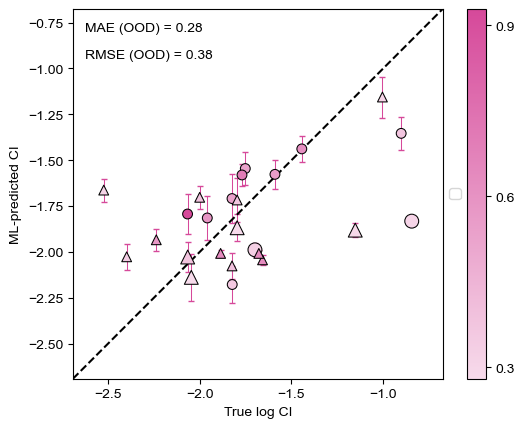

In [14]:
plot_ce_parity(df_pred_strat2, figname='ce_parity_ood_final_gr_strat2_cv_comm_.eps')

In [41]:
print(df_pred_strat2['group'].unique())
print(df_pred_strat2['class'].unique())

['in-house' 'literature']
['Ether' 'Others']


In [30]:
df_pred_strat2.loc[df_pred_strat2['similarity'] <= 0.35]
df_pred_strat2.query('similarity <= 0.35 & `true_log(1-CE)` < -2')

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var,similarity,most_similar,error,error_sq
16,FCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.522879,Ether,literature,-1.662834,0.062680,0.312500,COCCOCCOCCOC,0.860044,0.739676
18,COCC(OC)C(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,2.0,0,2,0.5,-2.397940,Ether,literature,-2.026352,0.071425,0.347826,COCC(F)(F)C(F)(F)COC,0.371588,0.138078
22,CO[Si](C)(CCC(F)(F)F)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,3.0,0,1,1.0,-2.045757,Others,literature,-2.138338,0.128733,0.280000,COCC(F)(F)C(F)(F)COC,0.092580,0.008571


In [15]:
df_pred_strat2.to_csv('./stratified-split-2-cv/final_preds_random_ncomp_11.csv', index=False)

**Performance on random split**

In [19]:
df_train = pd.read_csv('./random-split/rand_train_gr_comb_add.csv')
df_val = pd.read_csv('./random-split/rand_val_gr_comb_add.csv')
df_test = pd.read_csv('./random-split/rand_test_gr_comb_add.csv')
df_ood = pd.read_csv('./random-split/ce_ood_final_comp.csv')
df_train

,solv_smile_comb,salt_smile_comb,solv_fp_0_mol_0,solv_fp_1_mol_0,solv_fp_2_mol_0,solv_fp_3_mol_0,solv_fp_4_mol_0,solv_fp_5_mol_0,solv_fp_6_mol_0,solv_fp_7_mol_0,...,solv_ratio_2,solv_ratio_3,mw_salt_1,mw_salt_2,salt_1_conc,salt_2_conc,mw_add,protocol,current_density,log(1-CE)
0,O=C1OCCO1.COC(=O)OC.COCCOCCOCCOCCOC,F[P-](F)(F)(F)(F)F.[Li+].O=[N+]([O-])[O-].[Li+],0.028599,0.031528,-0.013138,0.034162,-0.008458,-0.006427,-0.009211,0.015324,...,0.600000,0.2,151.980186,0.000000,1.0,0.0,69.003822,1,2.0,-1.698970
1,COC(=O)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-0.008580,-0.008070,-0.013210,-0.009722,-0.010997,-0.007725,-0.011858,-0.004951,...,0.000000,0.0,186.939685,0.000000,1.2,0.0,0.000000,1,0.5,-0.040959
2,COCCOCCOCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+].O=C1OCCO1,-0.005206,0.013194,-0.012076,-0.008618,-0.006324,-0.005831,-0.007005,0.032790,...,0.000000,0.0,186.939685,0.000000,3.0,0.0,88.016044,1,0.4,-1.568636
3,O=C1OCCO1.COC(=O)OC,F[P-](F)(F)(F)(F)F.[Li+],0.070854,0.054446,-0.014466,0.087637,-0.011126,-0.007172,-0.011968,-0.006509,...,0.500000,0.0,151.980186,0.000000,1.0,0.0,0.000000,1,0.6,-1.366532
4,COCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+].O=S(=O)([N-]S(=...,-0.005390,-0.004935,-0.011686,-0.010327,-0.004394,-0.005828,-0.007275,0.091065,...,0.000000,0.0,186.939685,286.933298,4.0,2.0,0.000000,1,0.5,-1.080922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,O=C1OCCO1.CCOC(=O)OCC,F[P-](F)(F)(F)(F)F.[Li+].O=C1OCC(F)O1,0.069424,0.046331,-0.015139,0.083333,-0.011125,-0.007302,-0.011989,-0.007036,...,0.500000,0.0,151.980186,0.000000,1.0,0.0,106.006622,3,0.5,-1.301030
109,CC1COC(=O)O1,[Li+].[O-][Cl+3]([O-])([O-])[O-].O=S=O,0.130691,0.050793,-0.015092,0.162493,0.007925,-0.006418,-0.010257,-0.007271,...,0.000000,0.0,105.964516,0.000000,1.0,0.0,63.961900,1,5.0,-0.785156
110,CCOCCOCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-0.006364,0.055103,-0.013114,-0.009644,-0.006275,-0.006170,-0.007244,-0.003442,...,0.000000,0.0,186.939685,0.000000,1.2,0.0,0.000000,-1,0.5,-2.000000
111,COC(=O)CC(F)(F)F.O=C1OCC(F)O1,F[P-](F)(F)(F)(F)F.[Li+],0.218118,0.012724,-0.010560,0.073425,-0.011996,0.002649,-0.000737,0.001076,...,0.090909,0.0,151.980186,0.000000,1.0,0.0,0.000000,2,0.5,-1.619789


In [20]:
X_train = df_train.iloc[:, 2:-1]  # Assuming first two columns are descriptions
y_train = df_train.iloc[:, -1].values
X_val = df_val.iloc[:, 2:-1]
y_val = df_val.iloc[:, -1].values
X_test = df_test.iloc[:, 2:-1]
y_test = df_test.iloc[:, -1].values
X_ood = df_ood.iloc[:, 2:-1]
y_ood = df_ood.iloc[:, -1].values

## scaling the data
scaler = MinMaxScaler().fit(X_train.iloc[:,-13:])
X_train_scaled = scaler.transform(X_train.iloc[:,-13:])
X_train_ = np.concatenate((X_train.iloc[:,:-13], X_train_scaled), axis=1)
X_val_scaled = scaler.transform(X_val.iloc[:,-13:])
X_val_ = np.concatenate((X_val.iloc[:,:-13], X_val_scaled), axis=1)
X_test_scaled = scaler.transform(X_test.iloc[:,-13:])
X_test_ = np.concatenate((X_test.iloc[:,:-13], X_test_scaled), axis=1)
X_ood_scaled = scaler.transform(X_ood.iloc[:,-13:])
X_ood_ = np.concatenate((X_ood.iloc[:,:-13], X_ood_scaled), axis=1)

In [21]:
df_pred_rand, rmse, mae = pred_ce(ncomp=11, split='random')
df_pred_rand

Avg RMSE ood: 0.41263554757227655, Avg MAE ood: 0.3286594406967307


,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house,-1.881242,0.107035
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house,-1.406905,0.050743
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house,-2.181931,0.029222
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house,-1.520052,0.078440
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house,-1.605306,0.083992
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house,-1.533475,0.067641
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house,-1.683988,0.074931
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house,-1.827414,0.051962
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house,-2.108280,0.070540
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house,-1.936207,0.063986


In [22]:
df_ref = pd.read_csv('./random-split/rand_train_gr_comb_add.csv') ## random split train set
df_ref['solv_0'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[0])
df_ref['solv_1'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[1] if len(x.split('.')) > 1 else '')
df_ref['solv_2'] = df_ref['solv_smile_comb'].apply(lambda x: x.split('.')[2] if len(x.split('.')) > 2 else '')
ref = list(set(df_ref['solv_0']).union(set(df_ref['solv_1'])).union(set(df_ref['solv_2'])))
ref.remove('')

In [23]:
ref_mol = [Chem.MolFromSmiles(sm) for sm in ref]
ref_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ref_mol]

def check_similarity(smile):
    mol = Chem.MolFromSmiles(smile)
    mol_fps = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    similarity = [DataStructs.FingerprintSimilarity(mol_fps, ref) for ref in ref_fps]
    max_similarity = max(similarity)
    ind = similarity.index(max_similarity)
    sim_smile = ref[ind]
    return max_similarity, ind, sim_smile

In [24]:
similarity_list = []
similar_smiles = []
for i in range(len(df_pred_rand)):
    sm = df_pred_rand['solv_smile_comb'][i]
    max_similarity, ind, sim_smile = check_similarity(sm)
    # print(sm, max_similarity, sim_smile)
    similarity_list.append(max_similarity)
    similar_smiles.append(sim_smile)
df_pred_rand['similarity'] = similarity_list
df_pred_rand['most_similar'] = similar_smiles
df_pred_rand

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var,similarity,most_similar
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house,-1.881242,0.107035,0.928571,FC(F)(F)COCCOCC(F)(F)F
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house,-1.406905,0.050743,0.375000,COCCOCCOC
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house,-2.181931,0.029222,0.357143,CCOCC
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house,-1.520052,0.078440,0.555556,COCCOCCOC
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house,-1.605306,0.083992,0.533333,COCCOC
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house,-1.533475,0.067641,0.705882,CCCCOCCCC
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house,-1.683988,0.074931,0.533333,COCCOC
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house,-1.827414,0.051962,0.588235,CCOCCOCC
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house,-2.108280,0.070540,0.333333,CCO[Si](OC)(OCC)OCC
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house,-1.936207,0.063986,0.304348,CCCCOCCCC


In [28]:
df_pred_rand['error'] = abs(df_pred_rand['log(1-CE)'] - df_pred_rand['true_log(1-CE)'])
df_pred_rand['error_sq'] = (df_pred_rand['log(1-CE)'] - df_pred_rand['true_log(1-CE)'])**2
print(np.sqrt(df_pred_rand.loc[df_pred_rand['similarity'] <= 0.35]['error_sq'].mean()))
print(np.sqrt(df_pred_rand.loc[df_pred_rand['similarity'] <= 0.4]['error_sq'].mean()))
print(np.sqrt(df_pred_rand.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.5283164694330412
0.47929134620913305
0.5833270994915885


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


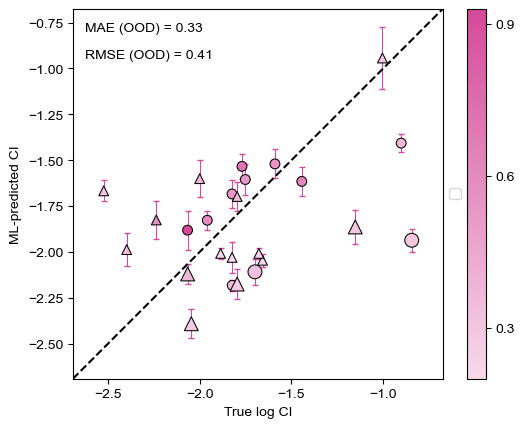

In [31]:
plot_ce_parity(df_pred_rand)

In [27]:
df_pred_rand.loc[df_pred_rand['similarity'] <= 0.4]
df_pred_rand.query('similarity <= 0.4 & `true_log(1-CE)` < -2')

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var,similarity,most_similar,error,error_sq
16,FCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.522879,Ether,literature,-1.666870,0.056712,0.312500,COCCOCCOC,0.856009,0.732752
18,COCC(OC)C(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,2.0,0,2,0.5,-2.397940,Ether,literature,-1.987146,0.090591,0.347826,COCC(F)(F)C(F)(F)COC,0.410794,0.168752
19,CS(=O)(=O)OCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,2.0,0,2,0.5,-2.065502,Others,literature,-2.119842,0.054038,0.380952,FC(F)(F)COCC(F)(F)F,0.054341,0.002953
22,CO[Si](C)(CCC(F)(F)F)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,3.0,0,1,1.0,-2.045757,Others,literature,-2.391167,0.077650,0.280000,COCC(F)(F)C(F)(F)COC,0.345409,0.119308


In [32]:
df_pred_rand.to_csv('./random-split/final_preds_random_ncomp_11.csv', index=False)

**For Chemprop models**

In [6]:
df_true_rand = pd.read_csv('./random-split/final_preds_random_ncomp_11.csv')
df_true_rand

,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),...,group,log(1-CE),log(1-CE)_uncal_var,similarity,most_similar,error,error_sq,marker,size,edgecolor
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,...,in-house,-1.881242,0.107035,0.928571,FC(F)(F)COCCOCC(F)(F)F,0.184837,0.034165,o,50,black
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,...,in-house,-1.406905,0.050743,0.375000,COCCOCCOC,0.504691,0.254713,o,50,black
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,...,in-house,-2.181931,0.029222,0.357143,CCOCC,0.359158,0.128994,o,50,black
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,...,in-house,-1.520052,0.078440,0.555556,COCCOCCOC,0.069908,0.004887,o,50,black
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,...,in-house,-1.605306,0.083992,0.533333,COCCOC,0.146245,0.021388,o,50,black
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,...,in-house,-1.533475,0.067641,0.705882,CCCCOCCCC,0.236076,0.055732,o,50,black
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,...,in-house,-1.683988,0.074931,0.533333,COCCOC,0.139920,0.019578,o,50,black
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,...,in-house,-1.827414,0.051962,0.588235,CCOCCOCC,0.131193,0.017212,o,50,black
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,...,in-house,-2.108280,0.070540,0.333333,CCO[Si](OC)(OCC)OCC,0.409310,0.167535,o,100,red
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,...,in-house,-1.936207,0.063986,0.304348,CCCCOCCCC,1.091543,1.191466,o,100,red


In [43]:
path = '../../../chemprop/'
# df_pred_rand_chem = pd.read_csv(path + 'random-split/deploy/final-ood/preds_ood_rand_e3_comm_s400.csv')
# df_pred_rand_chem = pd.read_csv(path + 'random-split/deploy/final-ood/preds_ood_rand_e3_comm_s700.csv')
# df_pred_rand_chem = pd.read_csv(path + 'random-split/deploy/final-ood/preds_ood_rand_e3_comm_s700_2.csv')
df_pred_rand_chem = pd.read_csv(path + 'random-split/deploy/final-ood/preds_ood_rand_e3_comm_s500.csv')

In [44]:
np.sqrt(mean_squared_error(df_pred_rand_chem['log(1-CE)'], df_true_rand['true_log(1-CE)']))

0.3865758450408071

In [45]:
df_pred_rand_chem['similarity'] = df_true_rand['similarity']
df_pred_rand_chem['true_log(1-CE)'] = df_true_rand['true_log(1-CE)']
df_pred_rand_chem

,solv_smile_comb,salt_smile_comb,log(1-CE),log(1-CE)_ensemble_uncal_var,similarity,true_log(1-CE)
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-2.008650,0.003537,0.928571,-2.066079
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.708141,0.009866,0.375000,-0.902214
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.695261,0.005498,0.357143,-1.822773
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.680141,0.006642,0.555556,-1.589960
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.721804,0.006073,0.533333,-1.751551
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.618068,0.010154,0.705882,-1.769551
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.679369,0.005952,0.533333,-1.823909
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.683691,0.006168,0.588235,-1.958607
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.763430,0.006854,0.333333,-1.698970
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.756449,0.007287,0.304348,-0.844664


In [14]:
# df_pred_rand_chem['error'] = abs(df_pred_rand_chem['log(1-CE)'] - df_pred_rand_chem['true_log(1-CE)'])
# df_pred_rand_chem['error_sq'] = (df_pred_rand_chem['log(1-CE)'] - df_pred_rand_chem['true_log(1-CE)'])**2
# print(np.sqrt(df_pred_rand_chem.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.4061645656019477


In [46]:
df_pred_rand_chem['error'] = abs(df_pred_rand_chem['log(1-CE)'] - df_pred_rand_chem['true_log(1-CE)'])
df_pred_rand_chem['error_sq'] = (df_pred_rand_chem['log(1-CE)'] - df_pred_rand_chem['true_log(1-CE)'])**2
print(np.sqrt(df_pred_rand_chem.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.5142370196979684


In [15]:
df_true_strat2 = pd.read_csv('./stratified-split-2-cv/final_preds_random_ncomp_11.csv')

In [47]:
# df_pred_strat2_chem = pd.read_csv(path + 'stratified-split-2-cv/deploy/final-ood/preds_ood_strat2_e3_comm_s400.csv')
df_pred_strat2_chem = pd.read_csv(path + 'stratified-split-2-cv/deploy/final-ood/preds_ood_strat2_e3_comm_s500.csv')

In [40]:
np.sqrt(mean_squared_error(df_pred_strat2_chem['log(1-CE)'], df_true_strat2['true_log(1-CE)']))

0.39831662333377243

In [48]:
df_pred_strat2_chem['similarity'] = df_true_strat2['similarity']
df_pred_strat2_chem['true_log(1-CE)'] = df_true_strat2['true_log(1-CE)']
df_pred_strat2_chem

,solv_smile_comb,salt_smile_comb,log(1-CE),log(1-CE)_ensemble_uncal_var,similarity,true_log(1-CE)
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-2.079116,0.004824,0.928571,-2.066079
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.767604,0.007804,0.375000,-0.902214
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.770269,0.004630,0.357143,-1.822773
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.738145,0.004736,0.555556,-1.589960
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.793205,0.003943,0.533333,-1.751551
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.679466,0.007330,0.705882,-1.769551
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.743127,0.003965,0.533333,-1.823909
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.749704,0.004377,0.588235,-1.958607
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.836930,0.004359,0.333333,-1.698970
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],-1.817600,0.005468,0.304348,-0.844664


In [19]:
# df_pred_strat2_chem['error'] = abs(df_pred_strat2_chem['log(1-CE)'] - df_pred_strat2_chem['true_log(1-CE)'])
# df_pred_strat2_chem['error_sq'] = (df_pred_strat2_chem['log(1-CE)'] - df_pred_strat2_chem['true_log(1-CE)'])**2
# print(np.sqrt(df_pred_strat2_chem.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.3753644782412351


In [49]:
df_pred_strat2_chem['error'] = abs(df_pred_strat2_chem['log(1-CE)'] - df_pred_strat2_chem['true_log(1-CE)'])
df_pred_strat2_chem['error_sq'] = (df_pred_strat2_chem['log(1-CE)'] - df_pred_strat2_chem['true_log(1-CE)'])**2
print(np.sqrt(df_pred_strat2_chem.query('similarity <= 0.35 & `true_log(1-CE)` < -2')['error_sq'].mean()))

0.45118796268035694


testing other random models... (PLSR)

In [91]:
df_pred_rand_2, rmse, mae = pred_ce(ncomp=10, split='random')
df_pred_rand_2

Avg RMSE ood: 0.4166372482625537, Avg MAE ood: 0.32970276706893187


,solv_smile_comb,salt_smile_comb,solv_ratio_1,solv_ratio_2,solv_ratio_3,salt_1_conc,salt_2_conc,protocol,current_density,true_log(1-CE),class,group,log(1-CE),log(1-CE)_uncal_var
0,FC(F)(F)COCCOCCOCC(F)(F)F,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-2.066079,Ether,in-house,-1.927648,0.117966
1,FCCOCCOCCOCCF,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.902214,Ether,in-house,-1.443608,0.067462
2,CCOC(OCC)OCC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.822773,Ether,in-house,-2.203555,0.034529
3,COCCOCC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.589960,Ether,in-house,-1.520297,0.075024
4,COCCOC(C)(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.751551,Ether,in-house,-1.626091,0.093965
5,CCCCOCCOC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.769551,Ether,in-house,-1.541199,0.066550
6,COCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.823909,Ether,in-house,-1.685726,0.072304
7,CCOCCOC(C)C,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.958607,Ether,in-house,-1.824324,0.056999
8,CCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-1.698970,Others,in-house,-2.109353,0.077313
9,CCCCCC[Si](OC)(OC)OC,O=S(=O)(F)[N-]S(=O)(=O)F.[Li+],1,0,0,1.0,0,2,0.5,-0.844664,Others,in-house,-1.940299,0.056264


In [93]:
df_pred_rand_2['similarity'] = df_pred_rand['similarity']
df_pred_rand_2['most_similar'] = df_pred_rand['most_similar']
df_pred_rand_2['error'] = abs(df_pred_rand_2['log(1-CE)'] - df_pred_rand_2['true_log(1-CE)'])
df_pred_rand_2['error_sq'] = (df_pred_rand_2['log(1-CE)'] - df_pred_rand_2['true_log(1-CE)'])**2
print(np.sqrt(df_pred_rand_2.loc[df_pred_rand_2['similarity'] <= 0.35]['error_sq'].mean()))
print(np.sqrt(df_pred_rand_2.loc[df_pred_rand_2['similarity'] <= 0.4]['error_sq'].mean()))

0.5295829257565895
0.4838594673652848


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


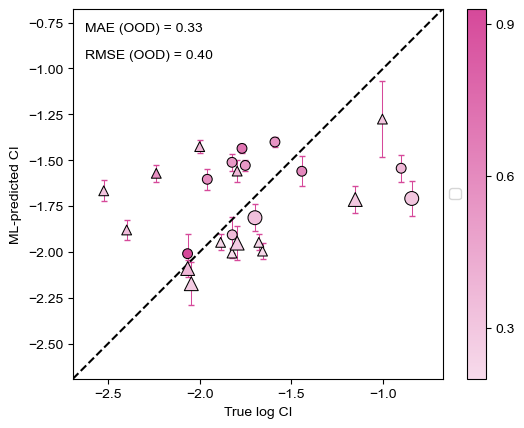

In [84]:
plot_ce_parity(df_pred_rand_2)

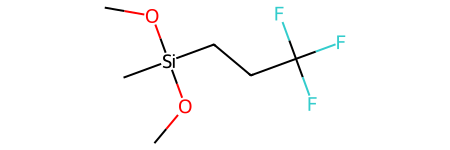

In [16]:
Chem.MolFromSmiles('CO[Si](C)(CCC(F)(F)F)OC')